In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
path = '../../shared_data/round2/'
days = [-1, 0, 1]

activity = [pd.read_csv(path + f'prices_round_2_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity.set_index(['DAY', 'timestamp'], inplace=True)
activity

ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
DAY timestamp                                                          
-1  0          1200.00             1.5           10.5           -2.0   
    100        1201.75             1.5            9.5           -2.0   
    200        1201.75             1.5            9.5           -2.0   
    300        1201.75             1.5            9.5           -2.0   
    400        1201.75             1.5            9.5           -2.0   
...                ...             ...            ...            ...   
 1  999600     1036.25             0.9            9.5           -5.0   
    999700     1036.25             0.9            9.5           -5.0   
    999800     1036.25             0.9            9.5           -5.0   
    999900     1034.25             0.9            9.5           -5.0   
    1000000    1035.25             0.9            9.5           -5.0   

                SUNLIGHT  HUMIDITY  
DAY timestamp                       
-1  0          2500.0000  79.00000  
    100        2499.4197  79.00410  
    200        2498.8457  79.00821  
    300        2498.2780  79.01234  
    400        2497.7166  79.01649  
...                  ...       ...  
 1  999600     2299.9436  69.93549  
    999700     2299.9556  69.95153  
    999800     2299.9690  69.96762  
    999900     2299.9840  69.98378  
    1000000    2300.0000  70.00000  

[30003 rows x 6 columns]

In [8]:
activity.describe()

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
count,30003.000000,30003.000000,30003.000000,30003.000000,30003.000000,30003.000000
mean,1103.617855,1.237043,9.728044,-3.405143,2777.073279,79.073562
std,81.975222,0.287521,1.368582,1.235526,912.366591,9.366057
min,960.750000,0.700000,7.500000,-6.500000,1397.304900,59.999580
25%,1039.250000,1.000000,8.500000,-4.500000,1973.018900,71.204712
50%,1081.750000,1.300000,9.500000,-2.600000,2498.066200,78.579020
75%,1195.750000,1.400000,10.500000,-2.400000,3619.445200,86.771817
max,1257.250000,2.100000,19.500000,-2.000000,4513.986300,97.513270


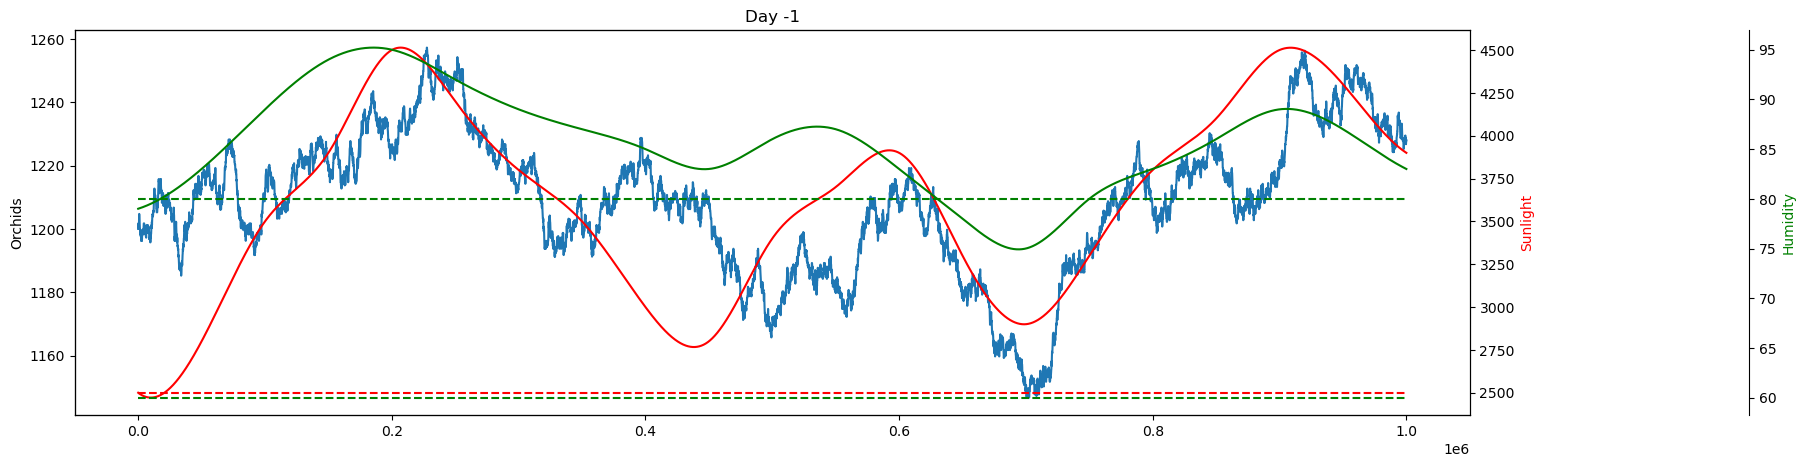

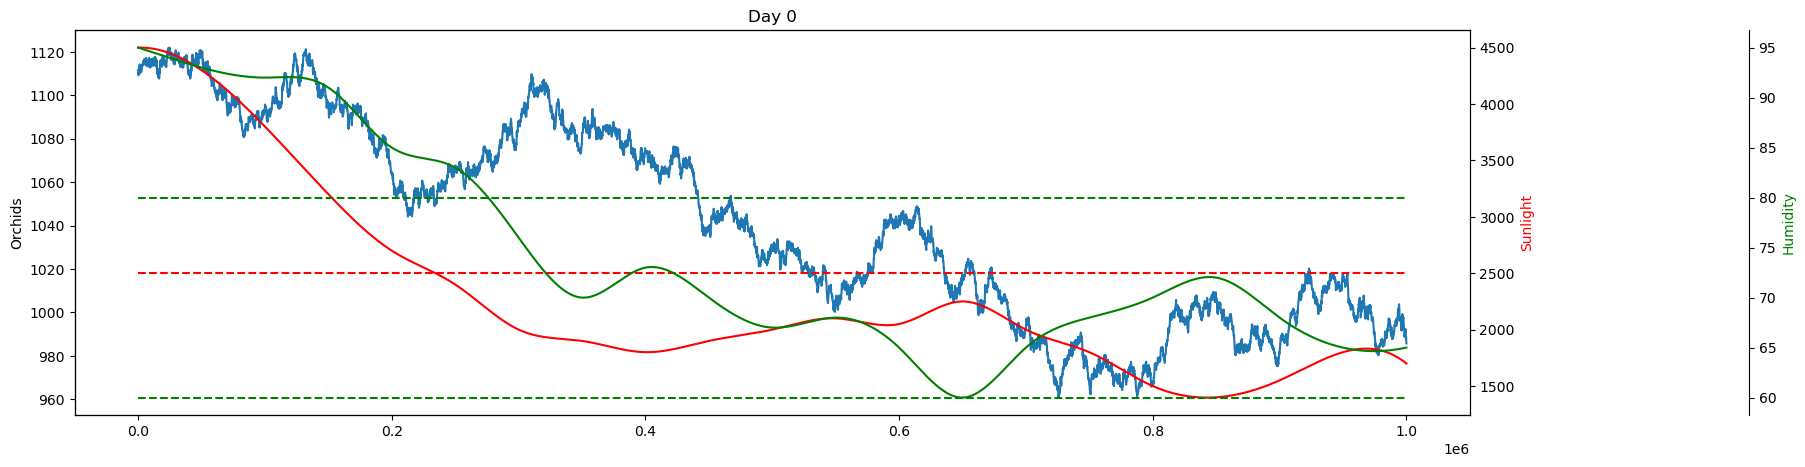

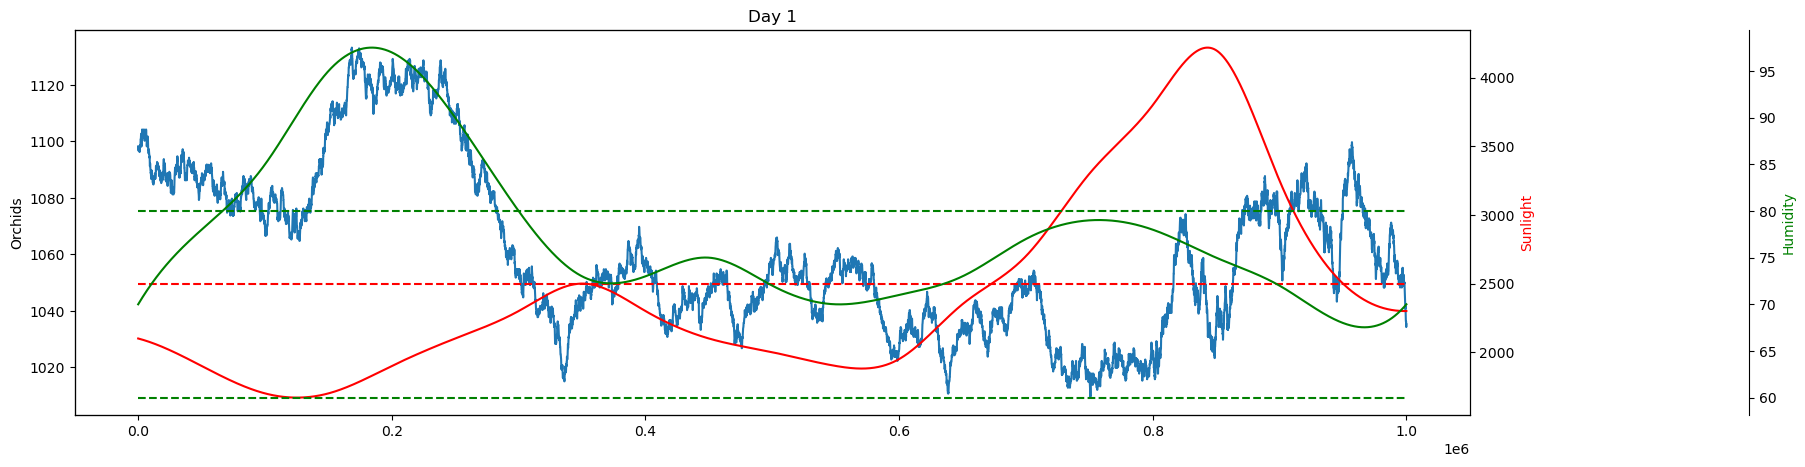

In [9]:
for d in days:
    fig, ax1 = plt.subplots(figsize=(18, 5))
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax3.spines.right.set_position(("axes", 1.2))

    ax1.plot(activity.loc[d].ORCHIDS)
    ax1.set_ylabel('Orchids')
    
    ax2.plot(activity.loc[d].SUNLIGHT, color='red')
    ax2.hlines(2500, 0, activity.loc[d].index.max(), color='red', linestyle='dashed')
    ax2.set_ylabel('Sunlight', color='red')

    ax3.plot(activity.loc[d].HUMIDITY, color='green')
    ax3.hlines(60, 0, activity.loc[d].index.max(), color='green', linestyle='dashed')
    ax3.hlines(80, 0, activity.loc[d].index.max(), color='green', linestyle='dashed')
    ax3.set_ylabel('Humidity', color='green')

    plt.title(f'Day {d}')
    plt.show()

In [10]:
sunlight = activity.SUNLIGHT.groupby('DAY').mean()
sunlight

DAY
-1    3619.750103
 0    2279.533353
 1    2431.936381
Name: SUNLIGHT, dtype: float64

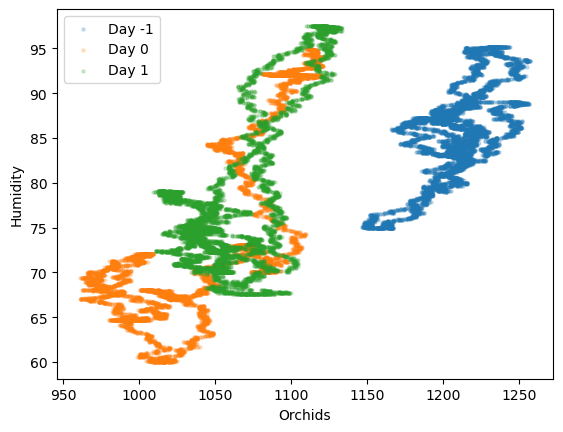

In [13]:
plt.figure()
for d in days:
    plt.scatter(activity.ORCHIDS.loc[d], activity.HUMIDITY.loc[d], label=f'Day {d}', s=5, alpha=0.2)

plt.legend()
plt.xlabel('Orchids')
plt.ylabel('Humidity')
plt.show()

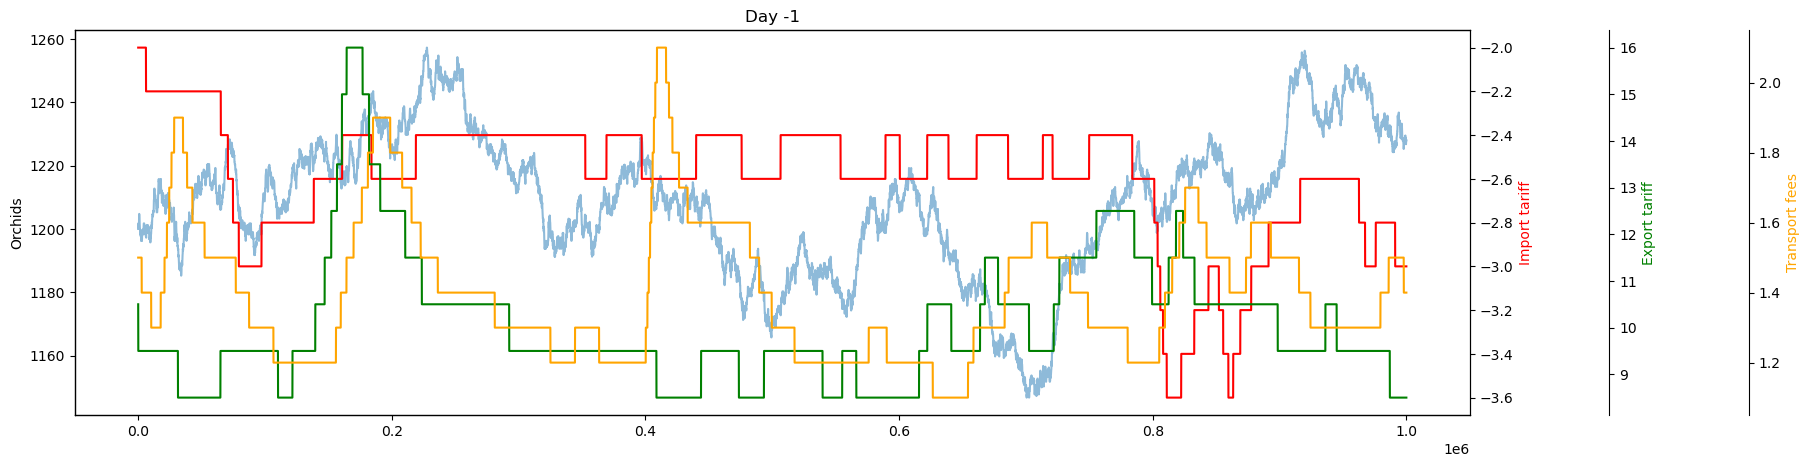

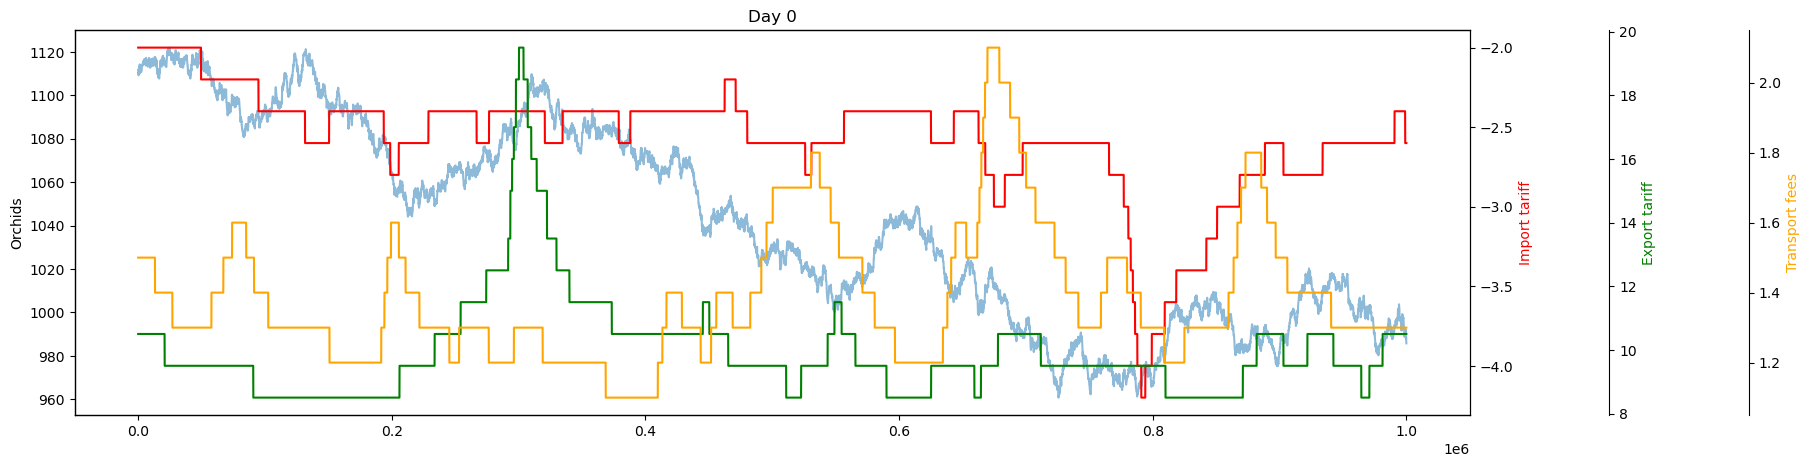

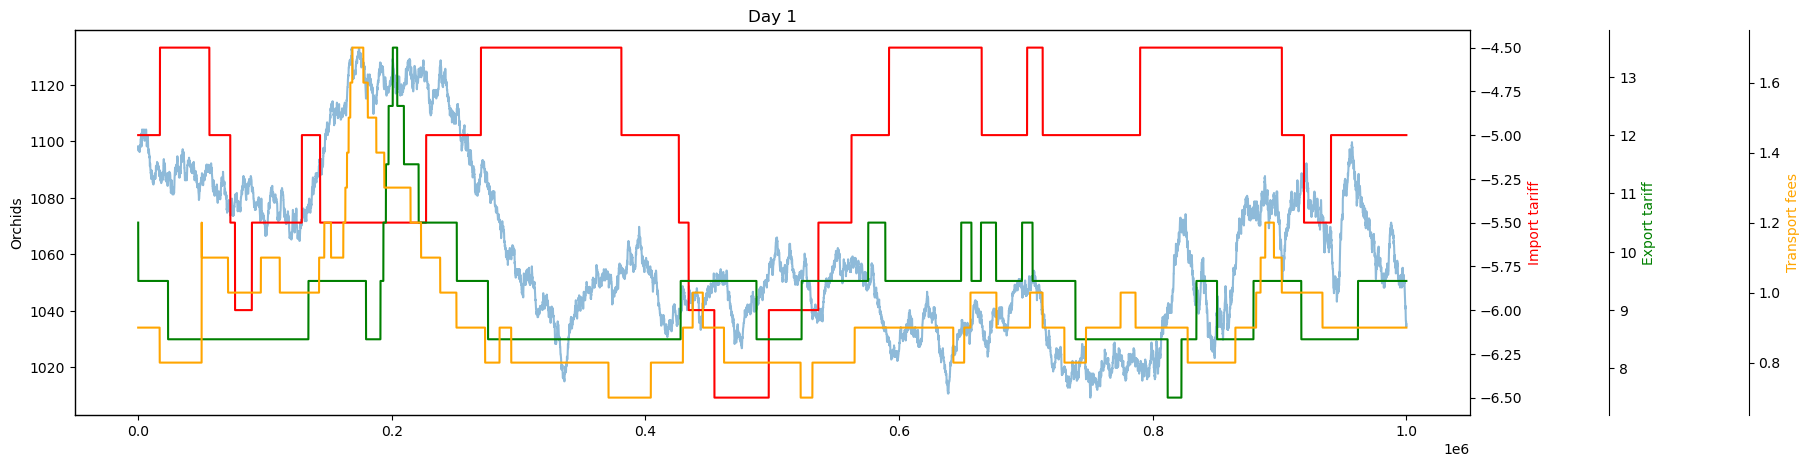

In [15]:
for d in days:
    fig, ax1 = plt.subplots(figsize=(18, 5))
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax4 = ax1.twinx()
    ax3.spines.right.set_position(("axes", 1.1))
    ax4.spines.right.set_position(("axes", 1.2))

    ax1.plot(activity.loc[d]['ORCHIDS'], alpha=0.5)
    ax1.set_ylabel('Orchids')
    
    ax2.plot(activity.loc[d]['IMPORT_TARIFF'], color='red')
    ax2.set_ylabel('Import tariff', color='red')

    ax3.plot(activity.loc[d]['EXPORT_TARIFF'], color='green')
    ax3.set_ylabel('Export tariff', color='green')

    ax4.plot(activity.loc[d]['TRANSPORT_FEES'], color='orange')
    ax4.set_ylabel('Transport fees', color='orange')

    plt.title(f'Day {d}')
    plt.show()

The local market mid price has random spikes while the foreign market mid price is relatively stable. Because most of the time, the difference between the two mid prices is <= 0.25 and the foreign market mid price is stable, we can use the foreign market mid price as the mid price of the product.

Given the ask/bid of current market $a(t)$ and $b(t)$, the observed mid price is given by:
$$ p(t) = \frac{a(t) + b(t)}{2} $$
The ask/bid/mid price will fluctuate over time. To model the fluctuation, we can assume that the mid price fluctuates around an expected value, say $p_e(t)$, which is the true **value** of the product.
$$ p(t) = p_e(t) + \epsilon(t) $$
where $\epsilon(t)$ is the noise term which average to 0 over time.